# Title
Finding Heavy Traffic Indicators on I-94

# Project Description
I'm going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

My goal is to find out what factors affect heavy traffic on I-94. These factors can be weather type, time of the day, time of the week, etc. 

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [2]:
# Data handling
import pandas as pd
import numpy as np
from datetime import datetime

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt

# EDA (pandas-profiling, etc. )
...

# Feature Processing (Scikit-learn processing, etc. )
...

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
...

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages


Ellipsis

# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [3]:
traffic=pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Dataset overview

Have a look at the loaded datsets using the following methods: `.head(), .info()`

In [4]:
traffic.shape

(48204, 9)

In [5]:
traffic.head(20)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
5,None,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181
6,None,293.17,0.0,0.0,1,Clear,sky is clear,2012-10-02 15:00:00,5584
7,None,293.86,0.0,0.0,1,Clear,sky is clear,2012-10-02 16:00:00,6015
8,None,294.14,0.0,0.0,20,Clouds,few clouds,2012-10-02 17:00:00,5791
9,None,293.10,0.0,0.0,20,Clouds,few clouds,2012-10-02 18:00:00,4770


In [6]:
traffic['holiday'].unique()

array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

## Hypothesis
#### Null Hypothesis, HO
Time is the number one factor that affects traffic the most.

#### AlternativeHypothesis, H1
Time is NOT the number one factor that affects traffic the most.

## Questions
1. Which holidays have the most traffic?
2. Which weekdays have the most traffic?
3. What time of day has the most traffic?(Is it morning, afternoon, evening, midnight or midday?)

MORNING
This is the time from midnight to midday.

AFTERNOON
This is the time from midday (noon) to evening.
From 12:00 hours to approximately 18:00 hours.

EVENING
This is the time from the end of the afternoon to midnight.
From approximately 18:00 hours to 00:00 hours.

MIDNIGHT
This is the middle of the night (00:00 hours).

MIDDAY
This is the middle of the day, also called "NOON" (12:00 hours).

4. Which factor affects traffic the most?
5. Compare rain, snow and temparature based on traffic_volume
6. What's the highest recorded traffic?


In [7]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Data Cleaning

In [8]:
#splitting the date_time column into date and time
traffic[['date','time']] = traffic['date_time'].str.split(' ',expand=True)
traffic.head(1)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,date,time
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,2012-10-02,09:00:00


In [9]:
#creating weekday column from date_time column
traffic['weekday'] =pd.to_datetime(traffic['date_time']).dt.day_name()
#.dt.dayofweek
traffic.drop(columns=['date_time'], axis=1, inplace = True)

traffic['weekday'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [10]:
def stringToTime(timeString):
    return datetime.strptime(timeString, '%H:%M:%S').time()
midnight=stringToTime('00:00:00')
midday=stringToTime('12:00:00')
sixpm=stringToTime('18:00:00')

#creating time_of_day column from time column
traffic['time_of_day'] = traffic['time'].apply(
    lambda x: 'morning' if midnight<stringToTime(x)<midday 
    else ('afternoon' if midday<stringToTime(x)<=sixpm
    else ('evening' if sixpm<=stringToTime(x)>midnight 
    else ('midday' if stringToTime(x)==midday
    else ('midnight' if stringToTime(x)==midnight
    else x)))) 
)

#dropping time column
#traffic.drop(columns=['time'], axis=1, inplace = True)
traffic['time'] = traffic['time'].apply(lambda x: int(stringToTime(x).strftime("%H%M%S")))
# int(current_date.strftime("%Y%m%d%H%M%S")))

traffic['time_of_day'].unique()

array(['morning', 'midday', 'afternoon', 'evening', 'midnight'],
      dtype=object)

In [11]:
traffic.head(60)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,date,time,weekday,time_of_day
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012-10-02,90000,Tuesday,morning
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012-10-02,100000,Tuesday,morning
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012-10-02,110000,Tuesday,morning
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012-10-02,120000,Tuesday,midday
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012-10-02,130000,Tuesday,afternoon
5,None,291.72,0.0,0.0,1,Clear,sky is clear,5181,2012-10-02,140000,Tuesday,afternoon
6,None,293.17,0.0,0.0,1,Clear,sky is clear,5584,2012-10-02,150000,Tuesday,afternoon
7,None,293.86,0.0,0.0,1,Clear,sky is clear,6015,2012-10-02,160000,Tuesday,afternoon
8,None,294.14,0.0,0.0,20,Clouds,few clouds,5791,2012-10-02,170000,Tuesday,afternoon
9,None,293.10,0.0,0.0,20,Clouds,few clouds,4770,2012-10-02,180000,Tuesday,afternoon


## Analysis

1. Which holidays have the most traffic?

In [12]:
top_holidays=traffic.groupby("holiday")["traffic_volume"].sum().reset_index().sort_values(by="traffic_volume",ascending=False)
top_holidays=top_holidays[top_holidays.holiday != 'None']
top_holidays

,holiday,traffic_volume
6,New Years Day,8136
3,Labor Day,7092
9,Thanksgiving Day,5601
5,Memorial Day,5538
2,Independence Day,5380
0,Christmas Day,4965
4,Martin Luther King Jr Day,3676
10,Veterans Day,3457
11,Washingtons Birthday,3176
8,State Fair,3174


C:\Users\My Pc\AppData\Local\Temp\ipykernel_6252\3356038720.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


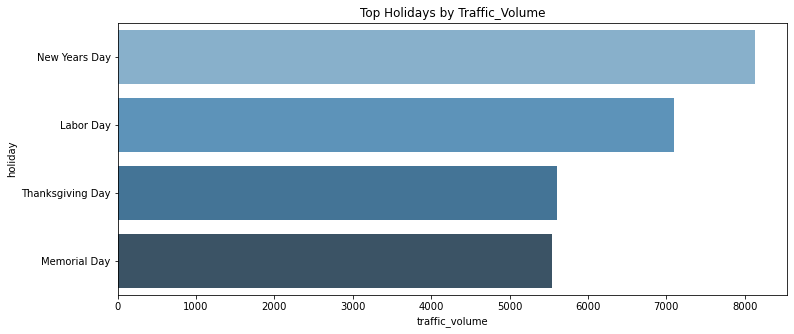

In [25]:
fig = plt.figure(figsize=(12,5))
plt.title("Top Holidays by Traffic_Volume")
sns.barplot(data=top_holidays.head(-7), y="holiday", x="traffic_volume", palette='Blues_d')

fig.show()

2. Which weekdays have the most traffic?

In [14]:
top_weekdays=traffic.groupby('weekday')["traffic_volume"].sum().reset_index().sort_values(by="traffic_volume",ascending=False)
top_weekdays

,weekday,traffic_volume
0,Friday,24994869
6,Wednesday,24831553
4,Thursday,24799562
5,Tuesday,23882653
1,Monday,23403986
2,Saturday,18946722
3,Sunday,16276939


C:\Users\My Pc\AppData\Local\Temp\ipykernel_6252\610389464.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


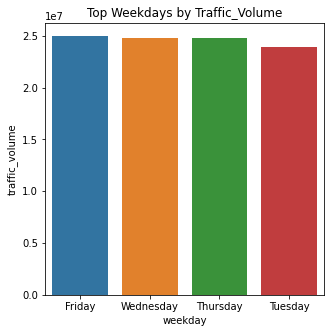

In [43]:
fig = plt.figure(figsize=(5,5))
plt.title("Top Weekdays by Traffic_Volume")
sns.barplot(data=top_weekdays.head(-3), x="weekday", y="traffic_volume")

fig.show()

3. What time of day has the most traffic?(Is it morning, afternoon, evening, midnight or midday?)

In [15]:
top_hours=traffic.groupby('time_of_day')["traffic_volume"].sum().reset_index().sort_values(by="traffic_volume",ascending=False)
top_hours

,time_of_day,traffic_volume
4,morning,62684570
0,afternoon,58819695
1,evening,24707307
2,midday,9224263
3,midnight,1700449


4. Which factor affects traffic the most?

In [16]:
corr_matrix=traffic.corr()
corr_matrix['traffic_volume'].sort_values(ascending=False)

traffic_volume    1.000000
time              0.352401
temp              0.130299
clouds_all        0.067054
rain_1h           0.004714
snow_1h           0.000733
Name: traffic_volume, dtype: float64

No variable has a strong linear correlation with traffic_volume.

Although traffic is independent of all other variables in our data, time has the strongest linear correlation with traffic volume.

Our null hypothesis is therefore true, since time affects traffic_volume the most.

5. Compare rain, snow and temparature based on traffic_volume

6. What's the highest recorded traffic?

In [17]:
top_traffic = traffic.sort_values('traffic_volume', ascending=False)
top_traffic.head(1)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,date,time,weekday,time_of_day
31615,None,270.75,0.0,0.0,90,Clouds,overcast clouds,7280,2017-03-09,160000,Thursday,afternoon
